In [1]:
# load data
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

# Data Cleaning and Preprocessing

In [3]:
df = pd.read_csv('student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
#Mengecek null value
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
#Mengecek duplikat
df.duplicated().sum()

0

In [6]:
#Drop data yang tidak diperlukan
df = df.drop(['address', 'Medu', 'Fedu', 'reason','guardian', 'schoolsup', 'famsup', 'traveltime', 'nursery', 'internet', 'romantic', 'famrel', 'goout', 'Dalc', 'Walc', 'health', 'absences'], axis=1)
df.head()

,school,sex,age,famsize,Pstatus,Mjob,Fjob,studytime,failures,paid,activities,higher,freetime,G1,G2,G3
0,GP,F,18,GT3,A,at_home,teacher,2,0,no,no,yes,3,5,6,6
1,GP,F,17,GT3,T,at_home,other,2,0,no,no,yes,3,5,5,6
2,GP,F,15,LE3,T,at_home,other,2,3,yes,no,yes,3,7,8,10
3,GP,F,15,GT3,T,health,services,3,0,yes,yes,yes,2,15,14,15
4,GP,F,16,GT3,T,other,other,2,0,yes,no,yes,3,6,10,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Mjob        395 non-null    object
 6   Fjob        395 non-null    object
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    int64 
 9   paid        395 non-null    object
 10  activities  395 non-null    object
 11  higher      395 non-null    object
 12  freetime    395 non-null    int64 
 13  G1          395 non-null    int64 
 14  G2          395 non-null    int64 
 15  G3          395 non-null    int64 
dtypes: int64(7), object(9)
memory usage: 49.5+ KB


In [8]:
#Mengubah tipe data
cols = ['school', 'sex', 'famsize', 'Mjob', 'Fjob', 'Pstatus', 'paid', 'activities', 'higher']
df[cols] = df[cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   famsize     395 non-null    category
 4   Pstatus     395 non-null    category
 5   Mjob        395 non-null    category
 6   Fjob        395 non-null    category
 7   studytime   395 non-null    int64   
 8   failures    395 non-null    int64   
 9   paid        395 non-null    category
 10  activities  395 non-null    category
 11  higher      395 non-null    category
 12  freetime    395 non-null    int64   
 13  G1          395 non-null    int64   
 14  G2          395 non-null    int64   
 15  G3          395 non-null    int64   
dtypes: category(9), int64(7)
memory usage: 26.5 KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='school', ylabel='G3'>

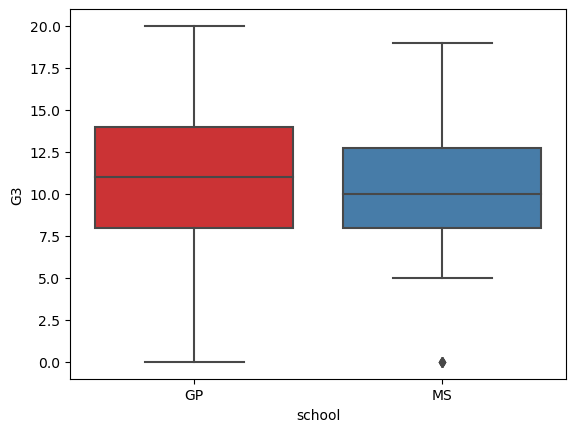

In [9]:
# Kode di bawah bertujuan untuk melihat distribusi dari nilai berdasarkan kategori sekolah dengan menggunakan boxplot.
sns.boxplot(x = "school", y = "G3", data = df, palette="Set1")

<AxesSubplot:xlabel='sex', ylabel='G3'>

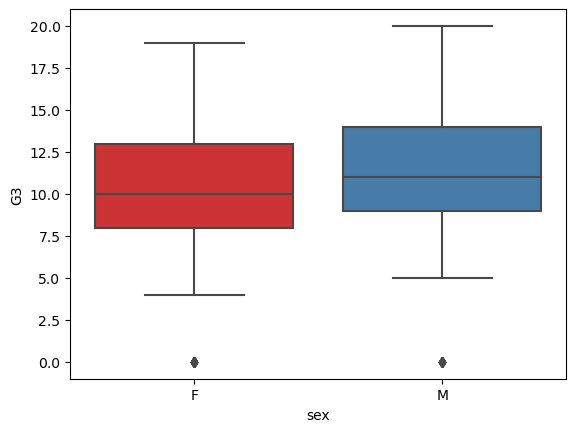

In [10]:
# Kode di bawah bertujuan untuk melihat distribusi dari nilai berdasarkan kategori jenis kelamin dengan menggunakan boxplot.
sns.boxplot(x = "sex", y = "G3", data = df, palette="Set1")

<AxesSubplot:xlabel='famsize', ylabel='G3'>

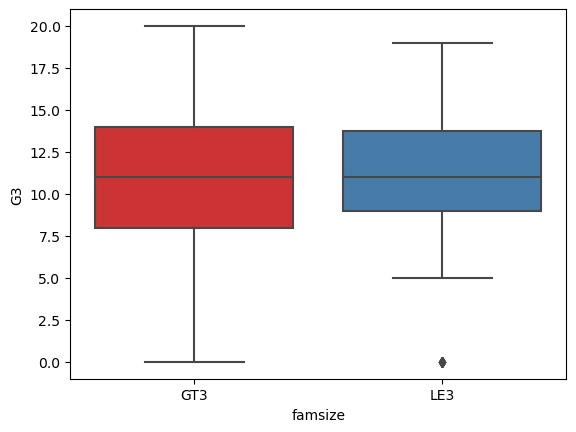

In [11]:
# Kode di bawah bertujuan untuk melihat distribusi dari nilai berdasarkan kategori jumlah anggota keluarga dengan menggunakan boxplot.
sns.boxplot(x = "famsize", y = "G3", data = df, palette="Set1")

<AxesSubplot:xlabel='Pstatus', ylabel='G3'>

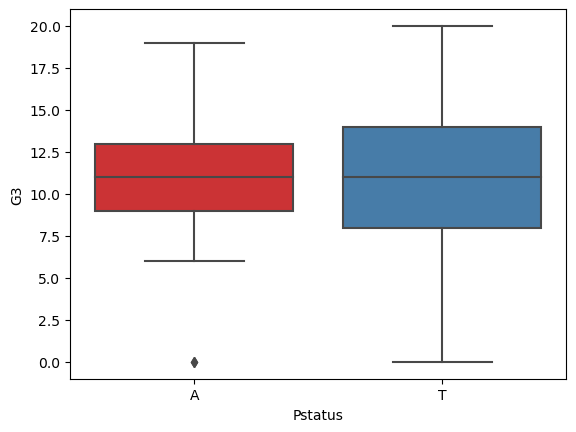

In [12]:
# Kode di bawah bertujuan untuk melihat distribusi dari nilai berdasarkan status orang tua dengan menggunakan boxplot.
sns.boxplot(x = "Pstatus", y = "G3", data = df, palette="Set1")

<AxesSubplot:xlabel='Mjob', ylabel='G3'>

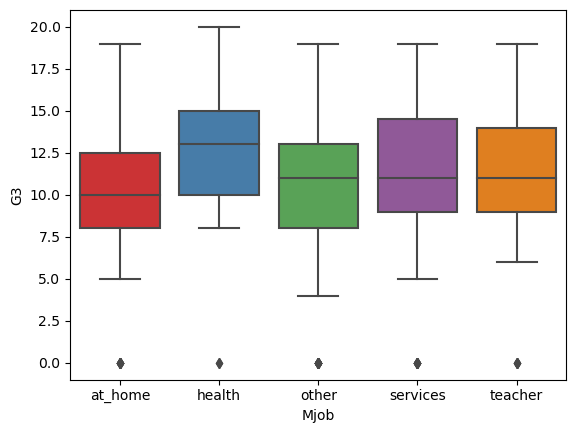

In [13]:
# Kode di bawah bertujuan untuk melihat distribusi dari nilai berdasarkan pekerjaan ibu dengan menggunakan boxplot.
sns.boxplot(x = "Mjob", y = "G3", data = df, palette="Set1")

<AxesSubplot:xlabel='Fjob', ylabel='G3'>

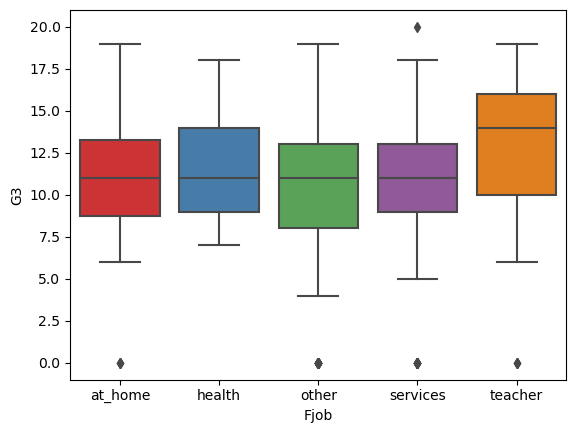

In [14]:
# Kode di bawah bertujuan untuk melihat distribusi dari nilai berdasarkan pekerjaan ayah dengan menggunakan boxplot.
sns.boxplot(x = "Fjob", y = "G3", data = df, palette="Set1")

<AxesSubplot:xlabel='paid', ylabel='G3'>

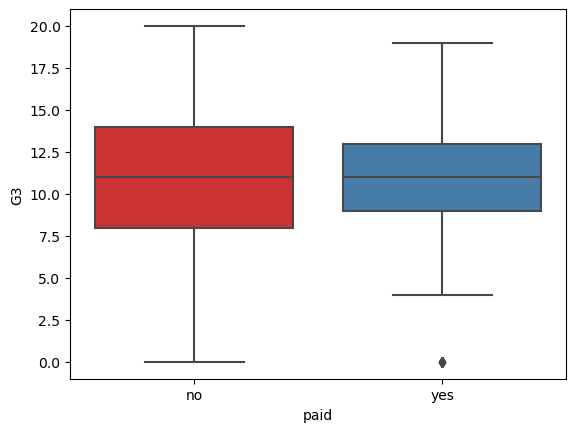

In [15]:
# Kode di bawah bertujuan untuk melihat distribusi dari nilai berdasarkan kategori mengikuti les di luar sekolah dengan menggunakan boxplot.
sns.boxplot(x = "paid", y = "G3", data = df, palette="Set1")

In [16]:
# Import module
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

In [17]:
male = df[df["sex"] == "M"]["G3"] # Membuat variabel untuk kategori laki-laki.
female = df[df["sex"] == "F"]["G3"] # Membuat variabel untuk kategori perempuan.

n_male = male.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_female = female.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(male, female, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk laki-laki = {n_male}')
print(f'Banyak sampel untuk perempuan = {n_female}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_laki-laki - mu_perempuan <= 0')
print('H1 : mu_laki-laki - mu_perempuan > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi \
antara laki-laki dan perempuan secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana laki-laki memiliki rata-rata probabilitas mendapat nilai \
yang lebih tinggi dibandingkan dengan perempuan.")

Banyak sampel untuk laki-laki = 187
Banyak sampel untuk perempuan = 208
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_laki-laki - mu_perempuan <= 0
H1 : mu_laki-laki - mu_perempuan > 0
alpha = 0.05
Statistik Hitung = 2.061992815503971
P Value = 0.019932666170763818
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi antara laki-laki dan perempuan secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana laki-laki memiliki rata-rata probabilitas mendapat nilai yang lebih tinggi dibandingkan dengan perempuan.


In [18]:
GP = df[df["school"] == "GP"]["G3"] # Membuat variabel untuk kategori sekolah di Gabriel Pereira .
MS = df[df["school"] == "MS"]["G3"] # Membuat variabel untuk kategori sekolah di Mousinho da Silveira .

n_GP = GP.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_MS = MS.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(GP, MS, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk yang bersekolah di Gabriel Pereira  = {n_GP}')
print(f'Banyak sampel untuk yang bersekolah di Mousinho da Silveira = {n_MS}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_GP - mu_MS <= 0')
print('H1 : mu_GP - mu_MS > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi \
antara antara yang bersekolah di Gabriel Pereira dengan Mousinho da Silveira secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana yang bersekolah di Gabriel Pereira memiliki rata-rata probabilitas mendapat nilai \
yang lebih tinggi dibandingkan dengan yang bersekolah di Mousinho da Silveira.")

Banyak sampel untuk yang bersekolah di Gabriel Pereira  = 349
Banyak sampel untuk yang bersekolah di Mousinho da Silveira = 46
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_GP - mu_MS <= 0
H1 : mu_GP - mu_MS > 0
alpha = 0.05
Statistik Hitung = 0.8933317649161906
P Value = 0.18611311856557344
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi antara antara yang bersekolah di Gabriel Pereira dengan Mousinho da Silveira secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana yang bersekolah di Gabriel Pereira memiliki rata-rata probabilitas mendapat nilai yang lebih tinggi dibandingkan dengan yang bersekolah di Mousinho da Silveira.


In [19]:
GT3 = df[df["famsize"] == "GT3"]["G3"] # Membuat variabel untuk kategori jumlah anggota keluarga kurang dari 3.
LE3 = df[df["famsize"] == "LE3"]["G3"] # Membuat variabel untuk kategori jumlah anggota keluarga lebih dari 3.

n_GT3 = GT3.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_LE3 = LE3.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(GT3, LE3, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk jumlah anggota keluarga kurang dari 3  = {n_LE3}')
print(f'Banyak sampel untuk jumlah anggota keluarga lebih dari 3 = {n_GT3}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_LE3 - mu_GT3 <= 0')
print('H1 : mu_LE3 - mu_GT3 > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi \
antara seseorang dengan jumlah anggota keluarga kurang dari 3 dengan jumlah anggota keluarga lebih dari 3 secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana yang memiliki jumlah anggota keluarga kurang dari 3 memiliki rata-rata probabilitas mendapat nilai \
yang lebih tinggi dibandingkan dengan yang memiliki jumlah anggota keluarga lebih dari 3.")

Banyak sampel untuk jumlah anggota keluarga kurang dari 3  = 114
Banyak sampel untuk jumlah anggota keluarga lebih dari 3 = 281
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_LE3 - mu_GT3 <= 0
H1 : mu_LE3 - mu_GT3 > 0
alpha = 0.05
Statistik Hitung = -1.6192073299128047
P Value = 0.9468975860807022
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi antara seseorang dengan jumlah anggota keluarga kurang dari 3 dengan jumlah anggota keluarga lebih dari 3 secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana yang memiliki jumlah anggota keluarga kurang dari 3 memiliki rata-rata probabilitas mendapat nilai yang lebih tinggi dibandingkan dengan yang memiliki jumlah anggota keluarga lebih dari 3.


In [20]:
T = df[df["Pstatus"] == "T"]["G3"] # Membuat variabel untuk kategori orang tua yang tinggal bersama.
A = df[df["Pstatus"] == "A"]["G3"] # Membuat variabel untuk kategori orang tua yang berpisah.

n_T = T.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_A = A.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(T, A, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk orang tua yang tinggal bersama  = {n_T}')
print(f'Banyak sampel untuk orang tua yang berpisah = {n_A}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_tinggal_bersama - mu_berpisah <= 0')
print('H1 : mu_tinggal_bersama - mu_berpisah > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi \
antara seseorang dengan orang tua yang lengkap dengan orang tua yang berpisah secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana yang memiliki orang tua lengkap memiliki rata-rata probabilitas mendapat nilai \
yang lebih tinggi dibandingkan dengan yang memiliki orang tua yang berpisah.")

Banyak sampel untuk orang tua yang tinggal bersama  = 354
Banyak sampel untuk orang tua yang berpisah = 41
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_tinggal_bersama - mu_berpisah <= 0
H1 : mu_tinggal_bersama - mu_berpisah > 0
alpha = 0.05
Statistik Hitung = -1.1519230889779004
P Value = 0.8749735303680415
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi antara seseorang dengan orang tua yang lengkap dengan orang tua yang berpisah secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana yang memiliki orang tua lengkap memiliki rata-rata probabilitas mendapat nilai yang lebih tinggi dibandingkan dengan yang memiliki orang tua yang berpisah.


In [21]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh jenis pekerjaan ibu
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : mu_at_home = mu_health = mu_other mJob = mu_services = mu_teacher")
print("H1 : Setidaknya terdapat satu yang berbeda")
print("Alpha = 0.05")

model_sampo = ols('G3 ~ Mjob', data = df).fit() # Membuat persamaan linear antara nilai dengan variabel Mjob.
aov_table_1 = sm.stats.anova_lm(model_sampo) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value > 0.05, maka keputusan yang diperoleh adalah gagal untuk menolak H0 yang dimana tidak adanya perbedaan rata - rata probabilitas seseorang \
mendapat nilai yang lebih tinggi yang signifkan dengan pekerjaan Ibunya" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_at_home = mu_health = mu_other mJob = mu_services = mu_teacher
H1 : Setidaknya terdapat satu yang berbeda
Alpha = 0.05
Hasil dari Uji ANOVA :
             df       sum_sq    mean_sq        F    PR(>F)
Mjob        4.0   306.643668  76.660917  3.75446  0.005195
Residual  390.0  7963.265193  20.418629      NaN       NaN
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value > 0.05, maka keputusan yang diperoleh adalah gagal untuk menolak H0 yang dimana tidak adanya perbedaan rata - rata probabilitas seseorang mendapat nilai yang lebih tinggi yang signifkan dengan pekerjaan Ibunya


In [22]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh jenis pekerjaan ayah
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : mu_at_home = mu_health = mu_other Fjob = mu_services = mu_teacher")
print("H1 : Setidaknya terdapat satu yang berbeda")
print("Alpha = 0.05")

model_sampo = ols('G3 ~ Fjob', data = df).fit() # Membuat persamaan linear antara nilai dengan variabel Fjob.
aov_table_1 = sm.stats.anova_lm(model_sampo) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value > 0.05, maka keputusan yang diperoleh adalah gagal untuk menolak H0 yang dimana tidak adanya perbedaan rata - rata probabilitas seseorang \
mendapat nilai yang lebih tinggi yang signifkan dengan pekerjaan Ayahnya" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : mu_at_home = mu_health = mu_other Fjob = mu_services = mu_teacher
H1 : Setidaknya terdapat satu yang berbeda
Alpha = 0.05
Hasil dari Uji ANOVA :
             df       sum_sq    mean_sq         F    PR(>F)
Fjob        4.0   109.055409  27.263852  1.302915  0.268314
Residual  390.0  8160.853452  20.925265       NaN       NaN
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value > 0.05, maka keputusan yang diperoleh adalah gagal untuk menolak H0 yang dimana tidak adanya perbedaan rata - rata probabilitas seseorang mendapat nilai yang lebih tinggi yang signifkan dengan pekerjaan Ayahnya


In [23]:
yes = df[df["paid"] == "yes"]["G3"] # Membuat variabel untuk kategori mengikuti les di luar kelas.
no = df[df["paid"] == "no"]["G3"] # Membuat variabel untuk kategori tidak mengikuti les di luar kelas.

n_yes = GT3.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_no = LE3.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(yes, no, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk murid yang mengikuti les di luar kelas  = {n_yes}')
print(f'Banyak sampel untuk murid yang tidak mengikuti les di luar kelas = {n_no}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_yes - mu_no <= 0')
print('H1 : mu_yes - mu_no > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi \
antara murid yang mengikuti les di luar kelas dengan murid yang tidak mengikuti les di luar kelas secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana murid yang mengikuti les di luar kelas memiliki rata-rata probabilitas mendapat nilai \
yang lebih tinggi dibandingkan dengan murid yang tidak mengikuti les di luar kelas.")

Banyak sampel untuk murid yang mengikuti les di luar kelas  = 281
Banyak sampel untuk murid yang tidak mengikuti les di luar kelas = 114
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_yes - mu_no <= 0
H1 : mu_yes - mu_no > 0
alpha = 0.05
Statistik Hitung = 2.0325971231028626
P Value = 0.021382532016787765
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata probabilitas seseorang mendapat nilai lebih tinggi antara murid yang mengikuti les di luar kelas dengan murid yang tidak mengikuti les di luar kelas secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana murid yang mengikuti les di luar kelas memiliki rata-rata probabilitas mendapat nilai yang lebih tinggi dibandingkan dengan murid yang tidak mengikuti les di luar kelas.


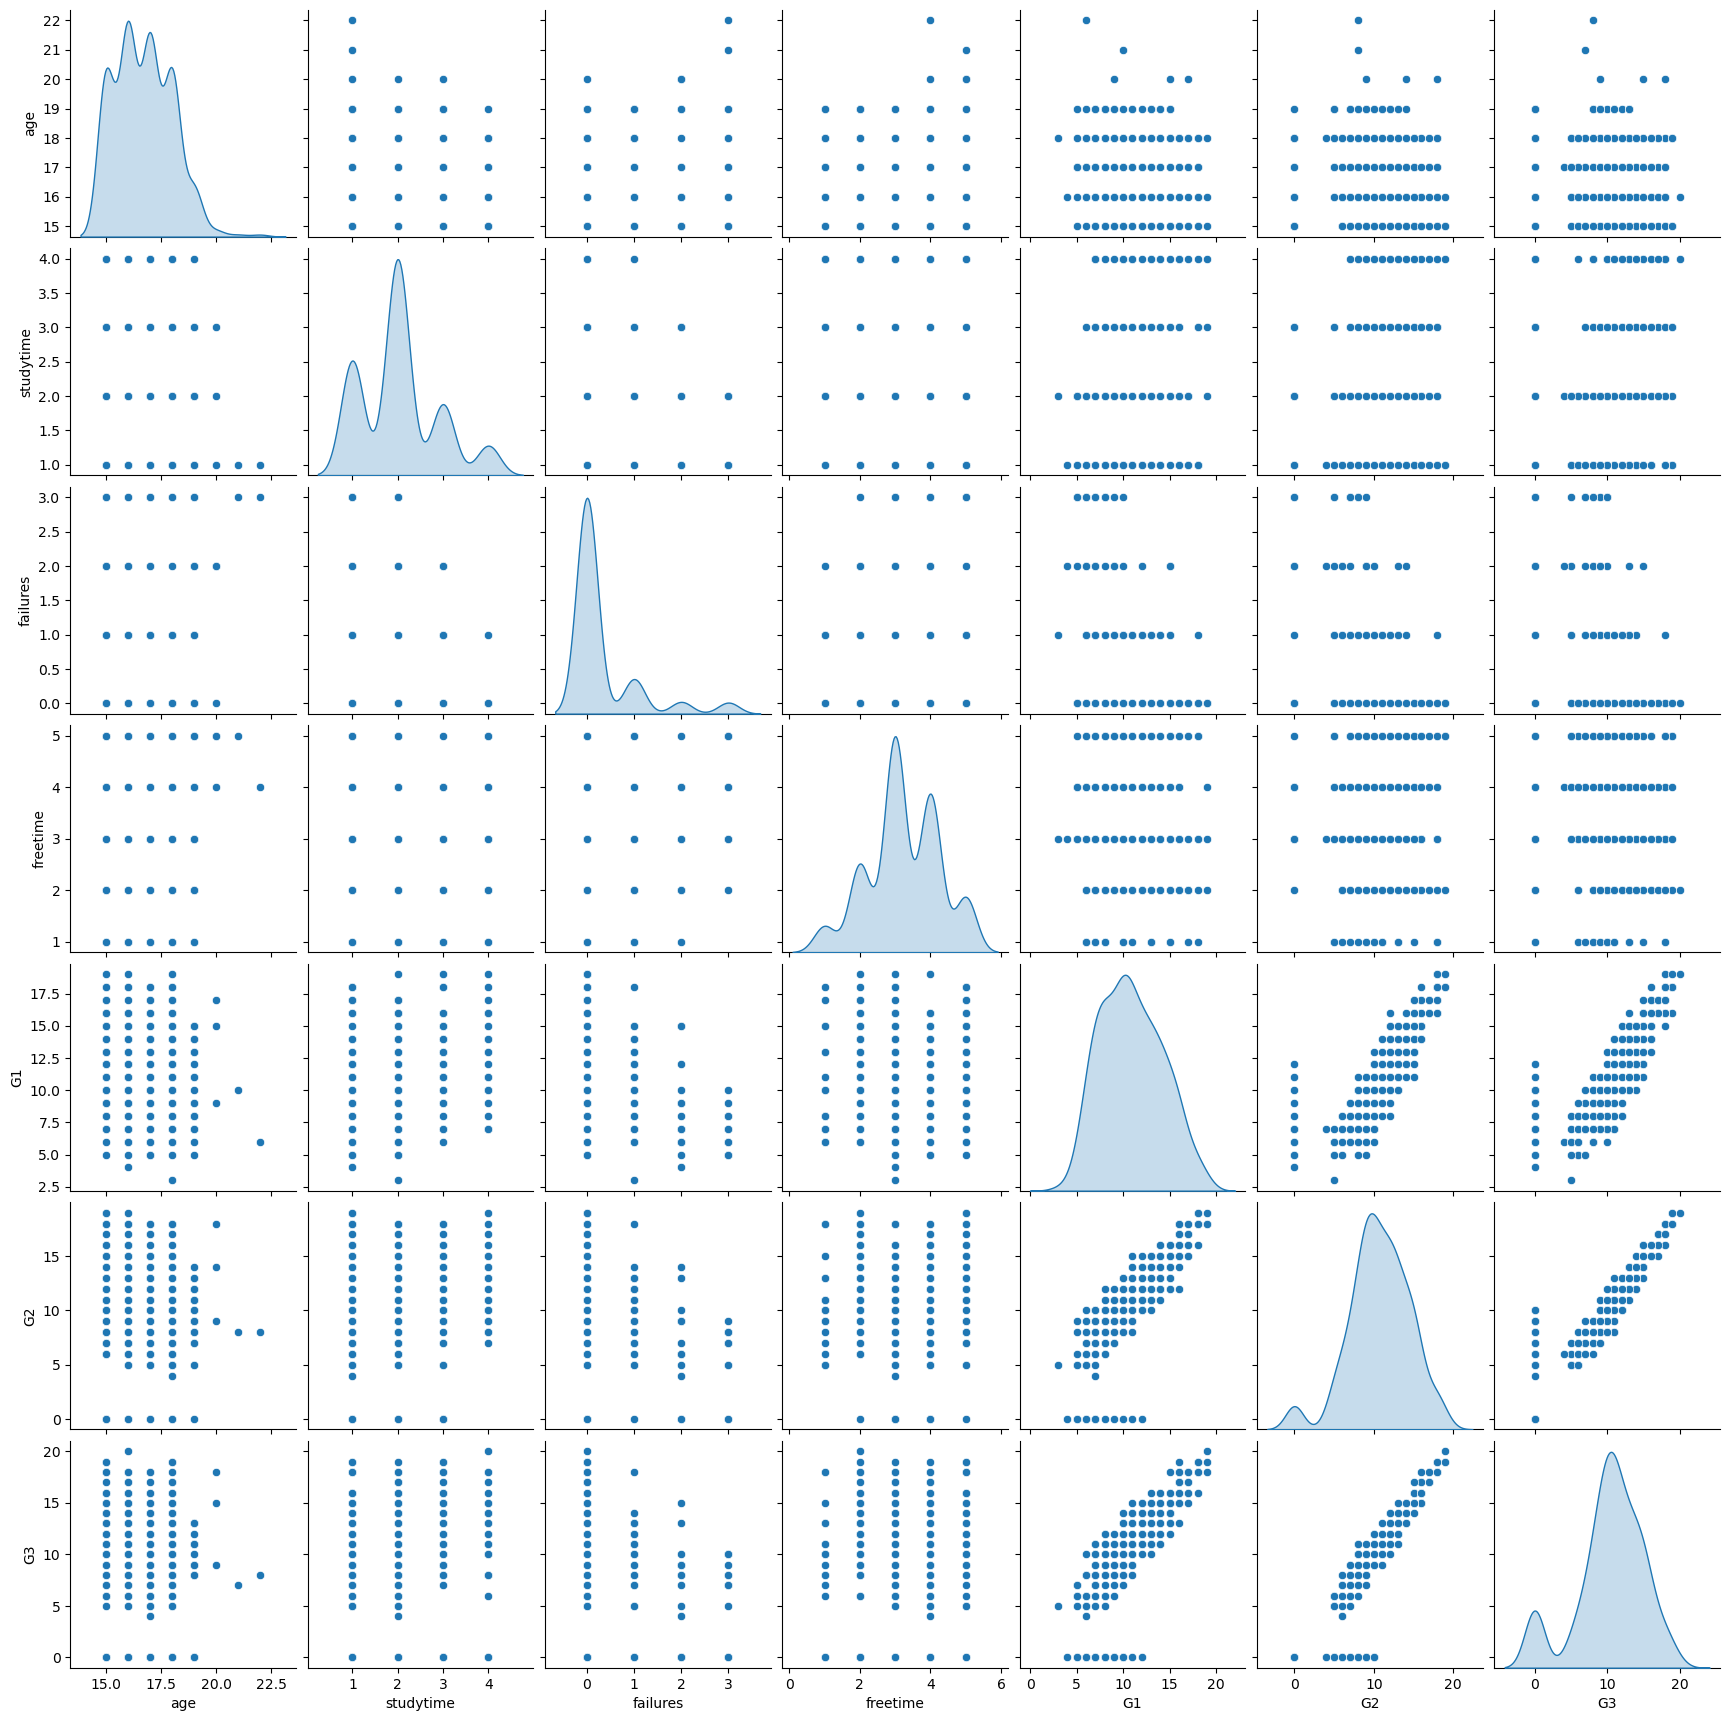

In [24]:
# Kode di bawah bertujuan untuk memvisualisasikan interaksi antara bebera features dengan meggunakan scatter plot dan kde plot.
columns_ = ["age", "studytime", "failures", "freetime", "G1", "G2", "G3"]
sns.pairplot(df[columns_], diag_kind = 'kde')
plt.show()

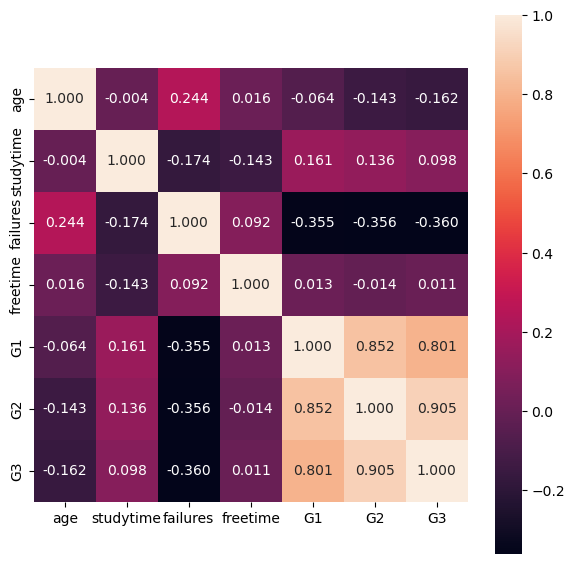

In [25]:
# Kode di bawah untuk melihat korelasi antar features.
corr_ = df[columns_].corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

# Building Regression Model

In [26]:
df

,school,sex,age,famsize,Pstatus,Mjob,Fjob,studytime,failures,paid,activities,higher,freetime,G1,G2,G3
0,GP,F,18,GT3,A,at_home,teacher,2,0,no,no,yes,3,5,6,6
1,GP,F,17,GT3,T,at_home,other,2,0,no,no,yes,3,5,5,6
2,GP,F,15,LE3,T,at_home,other,2,3,yes,no,yes,3,7,8,10
3,GP,F,15,GT3,T,health,services,3,0,yes,yes,yes,2,15,14,15
4,GP,F,16,GT3,T,other,other,2,0,yes,no,yes,3,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,services,services,2,2,yes,no,yes,5,9,9,9
391,MS,M,17,LE3,T,services,services,1,0,no,no,yes,4,14,16,16
392,MS,M,21,GT3,T,other,other,1,3,no,no,yes,5,10,8,7
393,MS,M,18,LE3,T,services,other,1,0,no,no,yes,4,11,12,10


In [27]:
# Exclude variabel-variabel yang tidak memberikan efek signifikan terhadap G3
df.drop(['age', 'studytime', 'freetime', 'activities', 'higher'], axis=1, inplace = True)
df

,school,sex,famsize,Pstatus,Mjob,Fjob,failures,paid,G1,G2,G3
0,GP,F,GT3,A,at_home,teacher,0,no,5,6,6
1,GP,F,GT3,T,at_home,other,0,no,5,5,6
2,GP,F,LE3,T,at_home,other,3,yes,7,8,10
3,GP,F,GT3,T,health,services,0,yes,15,14,15
4,GP,F,GT3,T,other,other,0,yes,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,LE3,A,services,services,2,yes,9,9,9
391,MS,M,LE3,T,services,services,0,no,14,16,16
392,MS,M,GT3,T,other,other,3,no,10,8,7
393,MS,M,LE3,T,services,other,0,no,11,12,10


In [28]:
# Use LabelEncoder to convert the Pstatus and paid variable into numeric
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the Pstatus and paid variable
df["Pstatus"] = LabelEncoder().fit_transform(df["Pstatus"])
df["paid"] = LabelEncoder().fit_transform(df["paid"])
df["sex"] = LabelEncoder().fit_transform(df["sex"])
df.head()

,school,sex,famsize,Pstatus,Mjob,Fjob,failures,paid,G1,G2,G3
0,GP,0,GT3,0,at_home,teacher,0,0,5,6,6
1,GP,0,GT3,1,at_home,other,0,0,5,5,6
2,GP,0,LE3,1,at_home,other,3,1,7,8,10
3,GP,0,GT3,1,health,services,0,1,15,14,15
4,GP,0,GT3,1,other,other,0,1,6,10,10


In [29]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#Construct the model
lm = smf.ols('G3 ~ school + sex + famsize + Pstatus + Mjob + Fjob + failures + paid + G1 + G2', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          7.60e-133
Time:                        22:19:21   Log-Likelihood:                -815.08
No. Observations:                 395   AIC:                             1664.
Df Residuals:                     378   BIC:                             1732.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.7572      0.701  

In [30]:
#Alternative way using one hot encoding
encoded_df = pd.get_dummies(data = df, columns = ['school', 'sex', 'famsize'])
encoded_df

,Pstatus,Mjob,Fjob,failures,paid,G1,G2,G3,school_GP,school_MS,sex_0,sex_1,famsize_GT3,famsize_LE3
0,0,at_home,teacher,0,0,5,6,6,1,0,1,0,1,0
1,1,at_home,other,0,0,5,5,6,1,0,1,0,1,0
2,1,at_home,other,3,1,7,8,10,1,0,1,0,0,1
3,1,health,services,0,1,15,14,15,1,0,1,0,1,0
4,1,other,other,0,1,6,10,10,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,services,services,2,1,9,9,9,0,1,0,1,0,1
391,1,services,services,0,0,14,16,16,0,1,0,1,0,1
392,1,other,other,3,0,10,8,7,0,1,0,1,1,0
393,1,services,other,0,0,11,12,10,0,1,0,1,0,1


In [31]:
#Construct the model
lm1 = smf.ols('G3 ~ Pstatus + Mjob + Fjob + failures + paid + G1 + G2 + school_GP + school_MS + sex_0 + sex_1 + famsize_GT3 + famsize_LE3',
              data = encoded_df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          7.60e-133
Time:                        22:19:21   Log-Likelihood:                -815.08
No. Observations:                 395   AIC:                             1664.
Df Residuals:                     378   BIC:                             1732.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6339      0.284  

In [32]:
# Create OLS model object
model = smf.ols('G3 ~ G1 + paid', df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_G1_paid_G3 = print_coef_std_err(results)
results_G1_paid_G3

,coef,std err
Intercept,-1.909015,0.484358
G1,1.102438,0.041431
paid,0.650032,0.275652


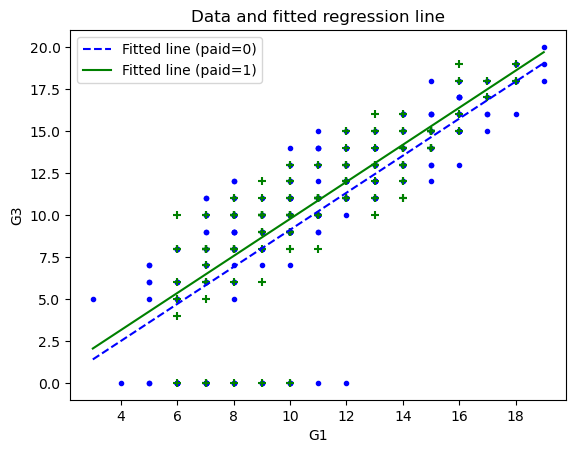

In [33]:
predictors = ["G1","paid"]
outcome = "G3"
data = df.copy()
results_ = results_G1_paid_G3.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "+"}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], 
                marker = markers[i])
    
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(2)]


# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (paid={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [34]:
# Create OLS model object
model = smf.ols('G3 ~ G1 + paid + G1:paid', df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_G1_paid_inter_charges = print_coef_std_err(results)
results_G1_paid_inter_charges

,coef,std err
Intercept,-2.395202,0.593788
G1,1.147498,0.052256
paid,1.973228,0.976767
G1:paid,-0.120809,0.085565


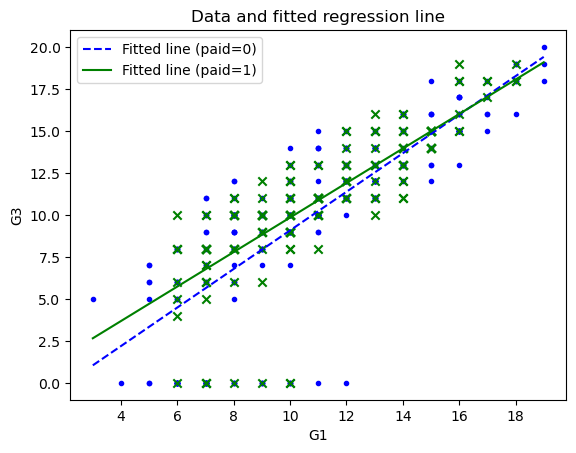

In [35]:
predictors = ["G1", "paid", "G1:paid"]
outcome = "G3"
data = df.copy()
results_ = results_G1_paid_inter_charges.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "x"}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (paid={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()